In [1]:
import pandas as pd
import plotly.express as px

from connection_funcs import *

In [2]:
exec_query('SELECT * FROM trips LIMIT 10')

,trip_id,membership_type,bike_id,checkout_date,checkout_time,checkout_station_id,checkout_station_name,return_station_id,return_station_name,duration_minutes,month,year
0,9900285854,Annual (San Antonio B-cycle),207,2014-10-26,0 days 13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10,2014
1,9900285855,24-Hour Kiosk (Austin B-cycle),969,2014-10-26,0 days 13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10,2014
2,9900285856,Annual Membership (Austin B-cycle),214,2014-10-26,0 days 13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,10,2014
3,9900285857,24-Hour Kiosk (Austin B-cycle),745,2014-10-26,0 days 13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10,2014
4,9900285858,24-Hour Kiosk (Austin B-cycle),164,2014-10-26,0 days 13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10,2014
5,9900285859,24-Hour Kiosk (Austin B-cycle),37,2014-10-26,0 days 13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,2545.0,ACC - Rio Grande & 12th,26,10,2014
6,9900285860,Annual Membership (Austin B-cycle),517,2014-10-26,0 days 13:12:00,2496.0,8th & Congress,2561.0,State Capitol Visitors Garage @ San Jacinto & ...,35,10,2014
7,9900285861,Annual Membership (Austin B-cycle),996,2014-10-26,0 days 13:12:00,2569.0,East 11th St. & San Marcos,2499.0,City Hall / Lavaca & 2nd,11,10,2014
8,9900285862,Annual Membership (Austin B-cycle),517,2014-10-26,0 days 13:12:00,2496.0,8th & Congress,2496.0,8th & Congress,0,10,2014
9,9900285863,24-Hour Kiosk (Austin B-cycle),385,2014-10-26,0 days 13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,2545.0,ACC - Rio Grande & 12th,25,10,2014


In [3]:
exec_query('SELECT * FROM stations LIMIT 10')

,station_id,station_name,status,location,address,alternate_name,asset_num,property_type,docks,power,length,width,notes,district
0,0,South Congress/Mary,active,"(30.244961, -97.751272)",1901 South Congress Ave.,None,0.0,undetermined_parking,11.0,solar,40.0,10.0,In the gutter,9
1,11,22nd 1/2 & Rio Grande,active,"(30.2862, -97.74516)",710 W. 22 1/2 St,None,NaN,sidewalk,4.0,solar,NaN,NaN,Kiosk ID & footprint length and width to be re...,9
2,111,23rd & San Gabriel,active,"(30.2874, -97.7478)",915 W 23rd St,None,NaN,paid_parking,13.0,solar,NaN,NaN,Kiosk ID and Footprint length & width to be re...,9
3,1001,OFFICE/Main/Shop/Repair,closed,"(30.27186, -97.73997)",1000 Brazos,None,NaN,,NaN,,NaN,NaN,This is the testing dock/station located at BS...,1
4,1002,6th & Navasota St.,closed,"(30.26383, -97.72864)",1308 W. 6th St.,None,NaN,,NaN,,NaN,NaN,,3
5,1003,8th & Guadalupe,closed,"(30.27106, -97.74563)",800 Guadalupe St.,None,NaN,,NaN,,NaN,NaN,,9
6,1004,Red River & LBJ Library,closed,"(30.2848, -97.72756)",2322 Red River Street,None,NaN,,NaN,,NaN,NaN,,1
7,1005,State Parking Garage @ Brazos & 18th,closed,"(30.27907, -97.73715)",1789 Brazos St.,None,NaN,,NaN,,NaN,NaN,,1
8,1006,Zilker Park West,closed,"(30.26587, -97.76826)",Barton Springs Rd,None,NaN,,NaN,,NaN,NaN,,8
9,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,None,NaN,,NaN,,NaN,NaN,,9


# Null Values and Data Consistency

The trips and stations tables contain several fields which should be redundant. The end and start station names in the trips table should not be necessary if we have the station ID and the station has an entry in the stations table.  The month, year and checkout_time fields in the trips table also seem to be redundant since the start_time contains the full datetime. Before we normalize the data we will want to investigate the consistency and completeness of the data, so that no useful information is thrown out unnecessarily.

In [28]:
exec_query("""
    SELECT 
        SUM(trip_id IS NULL) AS trip_id,
        SUM(membership_type IS NULL) AS membership_type,
        SUM(bike_id IS NULL) AS bike_id,
        SUM(checkout_date IS NULL) AS checkout_date,
        SUM(checkout_time IS NULL) AS checkout_time,
        SUM(checkout_station_id IS NULL) AS checkout_station_id,
        SUM(checkout_station_name IS NULL) AS checkout_station_name,
        SUM(return_station_id IS NULL) AS return_station_id,
        SUM(return_station_name IS NULL) AS return_station_name,
        SUM(duration_minutes IS NULL) AS duration_minutes,
        SUM(month IS NULL) AS month,
        SUM(year IS NULL) AS year
    FROM trips;""")

,trip_id,membership_type,bike_id,checkout_date,checkout_time,checkout_station_id,checkout_station_name,return_station_id,return_station_name,duration_minutes,month,year
0,0.0,0.0,723.0,0.0,0.0,23154.0,0.0,24547.0,0.0,0.0,965364.0,965364.0


In [5]:
exec_query("""
    SELECT 
        SUM(station_id IS NULL) AS station_id,
        SUM(station_name IS NULL) AS station_name,
        SUM(status IS NULL) AS status,
        SUM(location IS NULL) AS location,
        SUM(address IS NULL) AS address,
        SUM(alternate_name IS NULL) AS alternate_name,
        SUM(asset_num IS NULL) AS asset_num,
        SUM(property_type IS NULL) AS property_type,
        SUM(docks IS NULL) AS docks,
        SUM(power IS NULL) AS power,
        SUM(length IS NULL) AS length,
        SUM(width IS NULL) AS width,
        SUM(notes IS NULL) AS notes,
        SUM(district IS NULL) AS district
    FROM stations;""")

,station_id,station_name,status,location,address,alternate_name,asset_num,property_type,docks,power,length,width,notes,district
0,0.0,0.0,0.0,0.0,0.0,100.0,24.0,0.0,19.0,0.0,23.0,23.0,0.0,0.0


We can see that the fields which contain null values in the trips table are bike_id, return_station_id, checkout_station_id, month and year. Interestingly both the start and end station names have no null values, so these fields will be important for records with null station IDs. The checkout_date field also has no null values, so the null years and months may not be an issue. The null bike IDs likely cannot be imputed, but they represent a small fraction of trips and are unlikely to have a major impact on our analysis.

The stations table has null values in the alternate_name, asset_num, docks, length and width fields. None of these fields are likely to be relevant and can safely be ignored.

## Date and Time

From the previous query we can see that year and month each have exactly 965364 null values. We may want to know whether these are the same same trips.

In [10]:
exec_query("""
    SELECT COUNT(*) AS missing_year_xor_month
    FROM trips
    WHERE 
        year IS NULL 
        XOR month IS NULL;""")

,missing_year_xor_month
0,0


In every case where either the year or month is null, both fields are missing. 

In [28]:
exec_query("""
    SELECT 
        IF(year=YEAR(checkout_date),'Yes','No') AS year_consistent, 
        COUNT(*)
    FROM trips
    WHERE year IS NOT NULL
    GROUP BY year_consistent;""")

,year_consistent,COUNT(*)
0,Yes,618479


In [29]:
exec_query("""
    SELECT 
        IF(month=MONTH(checkout_date),'Yes','No') AS month_consistent, 
        COUNT(*)
    FROM trips
    WHERE MONTH IS NOT NULL
    GROUP BY month_consistent;""")

,month_consistent,COUNT(*)
0,Yes,618479


As we can see, both the year and month fields are in complete agreement with the checkout_date field for every trip where year and month are not null. We can safely disregard the year and month field without losing any information.

In [35]:
exec_query("""
    SELECT 
        MIN(checkout_date) AS first_date,
        MAX(checkout_date) AS last_date
    FROM trips;""")

,first_date,last_date
0,2013-12-21,2022-02-28


## Station Name and ID

To normalize our database we will have to ensure that station information is contained in the station table and not in the trip table. To do this we will need to ensure a one to one relationship between station ID and station name. We will then be able to use the station name to impute an ID where station ID is null.

In [19]:
run_sql("""
    DROP VIEW IF EXISTS name_id_pairs;
    CREATE VIEW name_id_pairs AS
    SELECT checkout_station_name AS name, checkout_station_id AS id, "Start" AS start_end
    FROM trips
    UNION ALL
    SELECT return_station_name AS name, return_station_id AS id, "End" AS start_end
    FROM trips;""")

In [20]:
exec_query("""
    SELECT name, COUNT(DISTINCT(id)) AS num_ids
    FROM name_id_pairs
    GROUP BY name
    HAVING num_ids>1
    ORDER BY num_ids DESC;""")

,name,num_ids
0,22nd/Pearl,2
1,Dean Keeton/Speedway,2
2,Lavaca & 6th,2
3,Republic Square @ 5th & Guadalupe,2


It appears that there are 4 station names that correspond to multiple ids.

In [31]:
exec_query("""

    WITH cte AS (
        SELECT name
        FROM name_id_pairs
        GROUP BY name
        HAVING COUNT(DISTINCT id)>1)
        
    SELECT DISTINCT np.name AS name, np.id AS id
    FROM name_id_pairs np
    INNER JOIN cte ON cte.name=np.name
    ORDER BY name;""")

,name,id
0,22nd/Pearl,3792
1,22nd/Pearl,7188
2,Dean Keeton/Speedway,2498
3,Dean Keeton/Speedway,3794
4,Lavaca & 6th,1007
5,Lavaca & 6th,3294
6,Republic Square @ 5th & Guadalupe,3456
7,Republic Square @ 5th & Guadalupe,3455


In [32]:
exec_query("""       
    SELECT * 
    FROM stations
    WHERE station_id IN(
        SELECT DISTINCT id
        FROM name_id_pairs 
        WHERE name IN(
            SELECT name
            FROM name_id_pairs
            GROUP BY name
            HAVING COUNT(DISTINCT id)>1));""")

,station_id,station_name,status,location,address,alternate_name,asset_num,property_type,docks,power,length,width,notes,district
0,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,None,NaN,,NaN,,NaN,NaN,,9
1,2498,4th/Sabine,active,"(30.264327, -97.736446)",702 E 4th St,None,16734.0,sidewalk,17.0,non-metered,50.0,5.0,moved from 4th and Neches,9
2,3294,Lavaca & 6th,active,"(30.268887, -97.745242)",601 Lavaca St.,None,32515.0,sidewalk,12.0,solar,25.0,8.0,"double sided, remeasure",9
3,3455,Republic Square @ 5th & Guadalupe,closed,"(30.26753, -97.74805)",Federal Courthouse Plaza,None,16741.0,sidewalk,13.0,non-metered,40.0,5.0,Moved back to 4th/Guadalupe,9
4,3792,22nd & Pearl,active,"(30.2853, -97.7467)",900 W. 22nd,None,32669.0,undetermined_parking,13.0,solar,40.0,5.0,,9
5,3794,Dean Keeton & Speedway,active,"(30.28953, -97.73695)",180 E. Dean Keeton St.,None,32670.0,undetermined_parking,19.0,solar,55.0,5.0,,9


For the case of Lavaca & 6th, both ids are in the station table and correspond to the same location. The two station ids could most likely be consolidated into one without losing information. For both Republic Square @ 5th & Guadalupe and 22nd/Pearl one id is  in the station table and another is not. For these stations all instances of the missing id can simply be replaced by the id found in the stations table. Dean Keeton/Speedway is somewhat less clear, since one of the ids assigned to it should belong to an entirely different station (4th/Sabine). For trips where the station id and station name disagree, it is not entirely clear how to interperet the data. Before we can deal with disagreeing id and station name, we should first see whether any other station ids are missing from the station table.

In [23]:
exec_query("""
    SELECT DISTINCT name, id
    FROM name_id_pairs 
    WHERE id NOT IN(
        SELECT station_id
        FROM stations)
    ORDER BY id;""")

,name,id
0,Republic Square @ 5th & Guadalupe,3456
1,22.5/Rio Grande,4938
2,23rd/San Gabriel,7125
3,13th/Trinity,7131
4,One Texas Center,7186
5,South Congress/Mary,7187
6,22nd/Pearl,7188


Seven station ids are present in the trips table but not the stations table. Of these we have already seen that Republic Square @ 5th & Guadalupe and 22nd/Pearl have another id which is in the stations table. Further investigation shows that 22.5/Rio Grande 4938, 23rd/San Gabriel 7125, 13th/Trinity 7131, and South Congress/Mary 7187 correspond to station_ids 11, 111, 1111, and 0 respectively. One Texas Center 7186 does not appear to correspond to any station from the stations table. The nearest station in the stations table is at Barton Springs & Riverside (id: 2502), but the official metrobike map confirms that Barton Springs & Riverside and One Texas Center are separate stations. 

In [32]:
exec_query("""
    SELECT name, id, 
        COUNT(*) AS num_trips,
        COUNT(NULLIF(start_end, 'Start')) AS num_start, 
        COUNT(NULLIF(start_end, 'End')) AS num_end
    FROM name_id_pairs 
    WHERE id = 7186 OR name="One Texas Center";""")

,name,id,num_trips,num_start,num_end
0,One Texas Center,7186,10,5,5


In [33]:
exec_query("""
    SELECT *
    FROM trips 
    WHERE checkout_station_id = 7186 OR return_station_id = 7186;""")

,trip_id,membership_type,bike_id,checkout_date,checkout_time,checkout_station_id,checkout_station_name,return_station_id,return_station_name,duration_minutes,month,year
0,26076313,3-Day Weekender,21799,2022-02-27,0 days 09:42:34,7186,One Texas Center,2499,2nd/Lavaca @ City Hall,15,None,None
1,26082142,3-Day Weekender,21457,2022-02-28,0 days 12:28:59,2503,South Congress/James,7186,One Texas Center,6,None,None
2,26082144,3-Day Weekender,21699,2022-02-28,0 days 12:29:07,2503,South Congress/James,7186,One Texas Center,5,None,None
3,26082146,3-Day Weekender,19235,2022-02-28,0 days 12:29:14,2503,South Congress/James,7186,One Texas Center,5,None,None
4,26076315,3-Day Weekender,21455,2022-02-27,0 days 09:42:47,7186,One Texas Center,2499,2nd/Lavaca @ City Hall,15,None,None
5,26076318,3-Day Weekender,19386,2022-02-27,0 days 09:42:58,7186,One Texas Center,2499,2nd/Lavaca @ City Hall,14,None,None
6,26070986,Explorer,19783,2022-02-25,0 days 14:01:29,7186,One Texas Center,4059,Nash Hernandez/East @ RBJ South,45,None,None
7,26071928,Explorer,19386,2022-02-25,0 days 17:43:58,2503,South Congress/James,7186,One Texas Center,7,None,None
8,26072599,Explorer,19403,2022-02-25,0 days 23:00:54,7186,One Texas Center,2571,8th/Red River,12,None,None
9,26072742,Explorer,21455,2022-02-26,0 days 01:34:11,3619,6th/Congress,7186,One Texas Center,10,None,None


The name and id "One Texas Center" and 7186 always appear together and only appear in 10 different trips, all within the last 4 days in the available data. Since it represents such a small sample, it would be possible to simply delete any trips to or from One Texas Center without losing much data. However, the exact location of the station is readily availbale online and it would be trivial to add it to the stations table.

Now we can investigate whether any other trips have contradicting station id and station name.

In [36]:
exec_query("""
    SELECT id, COUNT(DISTINCT name) AS num_station_names
    FROM name_id_pairs
    GROUP BY id
    HAVING num_station_names>1
    ORDER BY num_station_names DESC;""")

,id,num_station_names
0,NaN,30
1,3455.0,4
2,2563.0,3
3,2498.0,3
4,3294.0,3
...,...,...
67,4058.0,2
68,4059.0,2
69,4061.0,2
70,4062.0,2


Over 70 ids have multiple names associated with them in the trips table. However, the majority of the cases are due to slight variations of the name for a single station, rather than a single id representing multiple stations.

In [12]:
exec_query("""
    SELECT np.name AS name_trips, 
        s.station_name AS station_name, 
        np.id AS id, 
        np.num_trips AS num_trips, 
        np.num_start AS num_start, 
        np.num_end AS num_end
    FROM (
        SELECT 
            name,   
            id,
            COUNT(*) AS num_trips, 
            COUNT(NULLIF(start_end, 'Start')) AS num_start, 
            COUNT(NULLIF(start_end, 'End')) AS num_end
        FROM name_id_pairs
        GROUP BY name, id) np
    JOIN stations s ON np.id=s.station_id
    WHERE id IN(
        SELECT id
        FROM name_id_pairs 
        GROUP BY id
        HAVING COUNT(DISTINCT name)>1)
    AND 
        REGEXP_REPLACE(LOWER(np.name), '[^0-9a-zA-Z ]|[:blank:]', '')
        !=REGEXP_REPLACE(LOWER(s.station_name), '[^0-9a-zA-Z ]|[:blank:]', '')
    ORDER BY id, num_trips DESC;""")


,name_trips,station_name,id,num_trips,num_start,num_end
0,Main Office,OFFICE/Main/Shop/Repair,1001,26,15,11
1,Stolen,OFFICE/Main/Shop/Repair,1001,1,0,1
2,11th/Congress @ The Texas Capitol,Capitol Station / Congress & 11th,2497,10005,4694,5311
3,Convention Center / 4th St. @ MetroRail,4th/Sabine,2498,65391,34010,31381
4,Dean Keeton/Speedway,4th/Sabine,2498,21014,10649,10365
5,4th/Neches @ MetroRail Downtown,4th/Sabine,2498,83,46,37
6,2nd/Lavaca @ City Hall,City Hall / Lavaca & 2nd,2499,11472,5926,5546
7,6th/West,West & 6th St.,2537,5024,2661,2363
8,3rd/Trinity @ The Convention Center,Convention Center / 3rd & Trinity,2539,12644,6360,6284
9,East 6th/Pedernales,East 6th & Pedernales St.,2544,4453,2152,2301


Most of these discrepancies are just different ways to refer to the same location. The only ids found with names that refer to completely different locations are 2498 and 3794.

In [5]:
exec_query("""
    SELECT np.name AS name_trips, 
        s.station_name AS station_name, 
        np.id AS id, 
        np.num_trips AS num_trips, 
        np.num_start AS num_start, 
        np.num_end AS num_end
    FROM (
        SELECT 
            name,   
            id,
            COUNT(*) AS num_trips, 
            COUNT(NULLIF(start_end, 'Start')) AS num_start, 
            COUNT(NULLIF(start_end, 'End')) AS num_end
        FROM name_id_pairs
        GROUP BY name, id) np
    JOIN stations s ON np.id=s.station_id
    WHERE id IN (2498,3794)
    ORDER BY id, num_trips DESC;""")

,name_trips,station_name,id,num_trips,num_start,num_end
0,Convention Center / 4th St. @ MetroRail,4th/Sabine,2498,65391,34010,31381
1,Dean Keeton/Speedway,4th/Sabine,2498,21014,10649,10365
2,4th/Neches @ MetroRail Downtown,4th/Sabine,2498,83,46,37
3,Dean Keeton & Speedway,Dean Keeton & Speedway,3794,49675,25856,23819
4,Dean Keeton/Speedway,Dean Keeton & Speedway,3794,4868,2487,2381
5,4th/Sabine,Dean Keeton & Speedway,3794,4523,2253,2270


In [62]:
station_lookup(2498)

,station_id,station_name,status,location,address,alternate_name,asset_num,property_type,docks,power,length,width,notes,district
0,2498,4th/Sabine,active,"(30.264327, -97.736446)",702 E 4th St,None,16734,sidewalk,17,non-metered,50.0,5.0,moved from 4th and Neches,9


In [61]:
station_lookup(3794)

,station_id,station_name,status,location,address,alternate_name,asset_num,property_type,docks,power,length,width,notes,district
0,3794,Dean Keeton & Speedway,active,"(30.28953, -97.73695)",180 E. Dean Keeton St.,None,32670,undetermined_parking,19,solar,55.0,5.0,,9


There is no clear way to determine whether the name or id should be trusted when they disagree. One method would be to compare the most common destinations and average trip times for each of the 4 name/id pairs, but this analysis will become easier once other irregularities in the data are addressed. 

### Null Ids

In [104]:
exec_query("""
    SELECT 
        name, 
        SUM(ISNULL(id)) AS num_nulls, 
        COUNT(id) AS num_ids
    FROM name_id_pairs
    GROUP BY name
    HAVING num_nulls>0
    ORDER BY num_nulls DESC;""")

,name,num_nulls,num_ids
0,Zilker Park at Barton Springs & William Barton...,24566.0,0
1,Dean Keeton & Speedway,8053.0,49675
2,ACC - West & 12th,4646.0,0
3,Convention Center/ 3rd & Trinity,2752.0,0
4,Mobile Station,2088.0,0
5,East 11th Street at Victory Grill,1791.0,0
6,Red River @ LBJ Library,1128.0,0
7,Main Office,646.0,26
8,Mobile Station @ Bike Fest,622.0,0
9,Bullock Museum @ Congress & MLK,340.0,21697


In [105]:
exec_query("""
    SELECT 
        name, 
        SUM(ISNULL(id)) AS num_nulls, 
        COUNT(id) AS num_ids
    FROM name_id_pairs
    GROUP BY name
    HAVING num_nulls>0 AND num_ids>0
    ORDER BY num_nulls DESC;""")

,name,num_nulls,num_ids
0,Dean Keeton & Speedway,8053.0,49675
1,Main Office,646.0,26
2,Bullock Museum @ Congress & MLK,340.0,21697
3,State Capitol @ 14th & Colorado,217.0,9050
4,Stolen,28.0,1


In [ ]:
exec_query("""

    WITH cte AS (
        SELECT 
            name, 
            SUM(ISNULL(id)) AS num_nulls, 
            COUNT(id) AS num_ids
        FROM name_id_pairs
        GROUP BY name
        HAVING num_nulls>0 AND num_ids>0
        ORDER BY num_nulls DESC)
        
    

    
    ;""")

In [ ]:
exec_query("""
    WITH cte AS(
        SELECT 
            name, 
            SUM(ISNULL(id)) AS num_nulls, 
            COUNT(id) AS num_ids
        FROM name_id_pairs
        GROUP BY name
        HAVING num_nulls>0 AND num_ids>0
        ORDER BY num_nulls DESC)
        
    SELECT 
        DISTINCT np.name AS name, 
        np.id AS id,
        cte.num_nulls,
        cte.num_ids
    FROM name_id_pairs np
    RIGHT JOIN cte ON cte.name=np.name
    ;""")

In [23]:
stations_without_id_query="""
    (SELECT DISTINCT checkout_station_name AS station_missing_id
    FROM trips
    WHERE checkout_station_id IS NULL)
    UNION DISTINCT
    (SELECT DISTINCT return_station_name
    FROM trips
    WHERE return_station_id IS NULL)"""
stations_without_id=exec_query(stations_without_id_query)
stations_without_id

,station_missing_id
0,Zilker Park at Barton Springs & William Barton...
1,Convention Center/ 3rd & Trinity
2,East 11th Street at Victory Grill
3,Red River @ LBJ Library
4,ACC - West & 12th
5,Main Office
6,Re-branding
7,Shop
8,Customer Service
9,Mobile Station


We now have a list of all the station names that appear without an ID for at least one trip. Both "Main Office" and "Stolen" appear on this list even though we know they are associated with ID 1001 for at least one trip. It would be useful to know whether any other stations appear with an ID as a start station but without an ID as an end station or vice-versa.

In [24]:
checkout_station_sometimes_has_id="""
    SELECT *
    FROM trips t
    INNER JOIN(
        (SELECT DISTINCT checkout_station_name AS station_missing_id
        FROM trips
        WHERE checkout_station_id IS NULL)
        UNION DISTINCT
        (SELECT DISTINCT return_station_name
        FROM trips
        WHERE return_station_id IS NULL)) s
    ON t.checkout_station_name=s.station_missing_id
    WHERE t.checkout_station_id IS NOT NULL"""
exec_query(checkout_station_sometimes_has_id)

,trip_id,membership_type,bike_id,checkout_date,checkout_time,checkout_station_id,checkout_station_name,return_station_id,return_station_name,duration_minutes,month,year,station_missing_id
0,9900285858,24-Hour Kiosk (Austin B-cycle),164,2014-10-26,0 days 13:12:00,2538,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0,Bullock Museum @ Congress & MLK
1,9900285906,24-Hour Kiosk (Austin B-cycle),283,2014-10-26,0 days 14:12:00,2541,State Capitol @ 14th & Colorado,2548.0,UT West Mall @ Guadalupe,12,10.0,2014.0,State Capitol @ 14th & Colorado
2,9900285907,24-Hour Kiosk (Austin B-cycle),746,2014-10-26,0 days 14:12:00,2541,State Capitol @ 14th & Colorado,2548.0,UT West Mall @ Guadalupe,10,10.0,2014.0,State Capitol @ 14th & Colorado
3,9900285953,24-Hour Kiosk (Austin B-cycle),100,2014-10-26,0 days 15:12:00,2538,Bullock Museum @ Congress & MLK,2501.0,5th & Bowie,17,10.0,2014.0,Bullock Museum @ Congress & MLK
4,9900286140,24-Hour Kiosk (Austin B-cycle),242,2014-10-26,0 days 18:12:00,2541,State Capitol @ 14th & Colorado,2541.0,State Capitol @ 14th & Colorado,19,10.0,2014.0,State Capitol @ 14th & Colorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40704,19676254,U.T. Student Membership,349G,2019-05-01,0 days 20:02:16,3794,Dean Keeton & Speedway,2495.0,4th & Congress,19,NaN,NaN,Dean Keeton & Speedway
40705,19679082,U.T. Student Membership,89,2019-05-02,0 days 12:46:11,3794,Dean Keeton & Speedway,3798.0,21st & Speedway @PCL,3,NaN,NaN,Dean Keeton & Speedway
40706,19680473,U.T. Student Membership,894,2019-05-02,0 days 16:11:33,3794,Dean Keeton & Speedway,3798.0,21st & Speedway @PCL,3,NaN,NaN,Dean Keeton & Speedway
40707,19680493,U.T. Student Membership,106G,2019-05-02,0 days 16:13:52,3794,Dean Keeton & Speedway,3798.0,21st & Speedway @PCL,4,NaN,NaN,Dean Keeton & Speedway


In [41]:
end_station_sometimes_has_id="""
    SELECT *
    FROM trips t
    INNER JOIN(
        (SELECT DISTINCT start_station_name AS station_missing_id
        FROM trips
        WHERE start_station_id IS NULL)
        UNION DISTINCT
        (SELECT DISTINCT end_station_name
        FROM trips
        WHERE end_station_id IS NULL)) s
    ON t.end_station_name=s.station_missing_id
    WHERE t.end_station_id IS NOT NULL"""
exec_query(end_station_sometimes_has_id)

,bike_id,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,station_missing_id
0,315,0 days 12:37:33,198,1001,Main Office,3,1001,Main Office,2017-03-07 12:37:33,Local365,13948351,2017,Main Office


"Main Office" and "Stolen" are the only names that appear both with and without an ID. 

In [ ]:
stations_without_id

The 22 different station names that appear without ID seem to fit into four categories: alternate names for existing stations, Main Office/Shop/Repair, missing or stolen bikes, and temporary stations. 

In [83]:
station_lookup(1001)

,station_id,station_name,status,location,address,alternate_name,asset_num,property_type,docks,power,length,width,notes,district
0,1001,OFFICE/Main/Shop/Repair,closed,"(30.27186, -97.73997)",1000 Brazos,None,None,,None,,None,None,This is the testing dock/station located at BS...,1


From the station table we can see that id 1001 is meant to be applied to all of the shop or office station names. Missing and stolen bikes can have a new ID of 0 associated to them.  Alternate station names will need to be matched to the appropriate ID in the locations table.

In [25]:
station_lookup(2546)

,latitude,location,longitude,name,station_id,status
0,30.2762,(30.27624 -97.74831),-97.7483,ACC - West & 12th Street,2546,closed


In [26]:
station_lookup(1004)

,latitude,location,longitude,name,station_id,status
0,30.2848,(30.2848 -97.72756),-97.7276,Red River & LBJ Library,1004,closed


In [27]:
station_lookup(2568)

,latitude,location,longitude,name,station_id,status
0,30.269,(30.26896 -97.72843),-97.7284,East 11th St. at Victory Grill,2568,active


In [28]:
station_lookup(2539)

,latitude,location,longitude,name,station_id,status
0,30.2643,(30.26426 -97.74023),-97.7402,Convention Center / 3rd & Trinity,2539,active


"Zilker Park at Barton Springs & William Barton Drive" is still somewhat ambiguous since there are two stations IDs that could match that location.

In [29]:
station_lookup(2574)

,latitude,location,longitude,name,station_id,status
0,30.2659,(30.2659 -97.76822),-97.7682,Zilker Park,2574,active


In [30]:
station_lookup(1006)

,latitude,location,longitude,name,station_id,status
0,30.2659,(30.26587 -97.76826),-97.7683,Zilker Park West,1006,ACL only


In [79]:
get_stations_zilker="""
    SELECT latitude, longitude, name, station_id, status, IF(station_id=1006 OR station_id=2574,'YES','NO') AS at_zilker
    FROM stations"""
station_locations=exec_query(get_stations_zilker)

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1054 (42S22): Unknown column 'latitude' in 'field list'
[SQL: 
    SELECT latitude, longitude, name, station_id, status, IF(station_id=1006 OR station_id=2574,'YES','NO') AS at_zilker
    FROM stations]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [84]:
get_stations="""
    SELECT 
        station_id,
        station_name,
        CAST(REGEXP_SUBSTR(location,'30\.[0-9]*') AS FLOAT) AS latitude, 
        CAST(REGEXP_SUBSTR(location,'\-97\.[0-9]*') AS FLOAT) AS longitude,
        status,
        address
    FROM stations"""
station_locations=exec_query(get_stations)
station_locations

,station_id,station_name,latitude,longitude,status,address
0,0,South Congress/Mary,30.2450,-97.7513,active,1901 South Congress Ave.
1,11,22nd 1/2 & Rio Grande,30.2862,-97.7452,active,710 W. 22 1/2 St
2,111,23rd & San Gabriel,30.2874,-97.7478,active,915 W 23rd St
3,1001,OFFICE/Main/Shop/Repair,30.2719,-97.7400,closed,1000 Brazos
4,1002,6th & Navasota St.,30.2638,-97.7286,closed,1308 W. 6th St.
...,...,...,...,...,...,...
97,4060,Red River/Cesar Chavez @ The Fairmont,30.2621,-97.7387,active,101 Red River St.
98,4061,Lakeshore @ Austin Hostel,30.2447,-97.7234,active,2200 S Lakeshore Blvd
99,4062,Lakeshore & Pleasant Valley,30.2426,-97.7173,active,2525 South Lakeshore Boulevard
100,4699,East 5th/Shady @ Eastside Bus Plaza,30.2521,-97.6981,active,5104 East 5th. Street


In [85]:
map_fig = px.scatter_mapbox(station_locations, 
                            lat='latitude', 
                            lon='longitude', 
                            hover_name='station_name',
                            hover_data=['station_id', 'status'],
                            color_discrete_map={'YES':'Red','NO':'Blue'},
                            zoom=12)
map_fig.update_layout(mapbox_style="carto-positron",
                     title='MetroBike Stations')
map_fig.show()

We can see from the map that Zilker Park and Zilker Park West are at nearly the exact same location. The West station 

In [34]:
zilker_month_query="""
    SELECT MONTH(start_time)
    FROM trips
    WHERE start_station_id=2574
    OR end_station_id=2574"""
zilker_monthly_trips=exec_query(zilker_month_query)

In [35]:
zilker_west_month_query="""
    SELECT MONTH(start_time)
    FROM trips
    WHERE start_station_id=1006
    OR end_station_id=1006"""
zilker_west_monthly_trips=exec_query(zilker_west_month_query)

array([[<AxesSubplot:title={'center':'MONTH(start_time)'}>]], dtype=object)

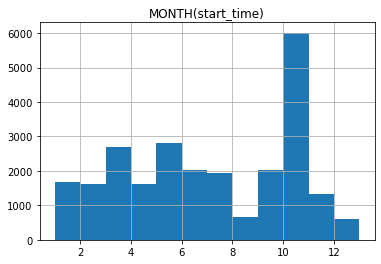

In [36]:
zilker_monthly_trips.hist(bins=[1,2,3,4,5,6,7,8,9,10,11,12,13])

array([[<AxesSubplot:title={'center':'MONTH(start_time)'}>]], dtype=object)

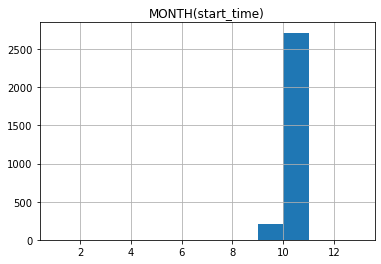

In [37]:
zilker_west_monthly_trips.hist(bins=[1,2,3,4,5,6,7,8,9,10,11,12,13])

In [38]:
zilker_wb_month_query="""
    SELECT MONTH(start_time)
    FROM trips
    WHERE start_station_name='Zilker Park at Barton Springs & William Barton Drive'
    OR end_station_name='Zilker Park at Barton Springs & William Barton Drive'"""
zilker_wb_monthly_trips=exec_query(zilker_wb_month_query)

array([[<AxesSubplot:title={'center':'MONTH(start_time)'}>]], dtype=object)

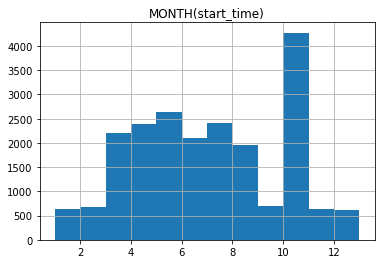

In [39]:
zilker_wb_monthly_trips.hist(bins=[1,2,3,4,5,6,7,8,9,10,11,12,13])

In [22]:
name_id_disagree_2498=exec_query("""
    SELECT 
        AVG(CASE
            WHEN checkout_station_id=2498 AND checkout_station_name='Dean Keeton/Speedway' THEN 1
            WHEN return_station_id=2498 AND return_station_name='Dean Keeton/Speedway' THEN 1
            ELSE 0
        END) AS id_name_disagree,
    DATE_SUB(checkout_date, INTERVAL DAY(checkout_date)-1 DAY) AS year_and_month
    FROM trips
    WHERE checkout_station_id=2498 OR return_station_id=2498
    GROUP BY year_and_month
    ORDER BY year_and_month;""")
name_id_disagree_2498

,id_name_disagree,year_and_month
0,0.0,2013-12-01
1,0.0,2014-01-01
2,0.0,2014-02-01
3,0.0,2014-03-01
4,0.0,2014-04-01
...,...,...
84,1.0,2021-10-01
85,1.0,2021-11-01
86,1.0,2021-12-01
87,1.0,2022-01-01


<AxesSubplot:xlabel='year_and_month'>

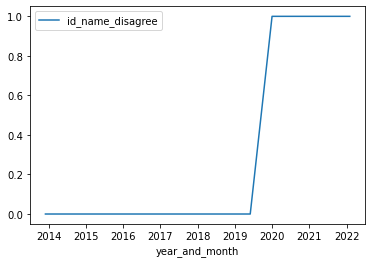

In [24]:
name_id_disagree_2498.plot(x="year_and_month",y="id_name_disagree")

In [26]:
exec_query("""
    SELECT 
        AVG(CASE
            WHEN checkout_station_id=2498 AND checkout_station_name='Dean Keeton/Speedway' THEN 1
            WHEN return_station_id=2498 AND return_station_name='Dean Keeton/Speedway' THEN 1
            ELSE 0
        END) AS id_name_disagree,
    DATE_SUB(checkout_date, INTERVAL DAY(checkout_date)-1 DAY) AS year_and_month
    FROM trips
    WHERE checkout_station_id=2498 OR return_station_id=2498
    GROUP BY year_and_month
    HAVING id_name_disagree=0
    ORDER BY year_and_month;""")

,id_name_disagree,year_and_month
0,0.0,2013-12-01
1,0.0,2014-01-01
2,0.0,2014-02-01
3,0.0,2014-03-01
4,0.0,2014-04-01
...,...,...
60,0.0,2019-02-01
61,0.0,2019-03-01
62,0.0,2019-04-01
63,0.0,2019-05-01


In [7]:
exec_query("""
    SELECT 
        AVG(CASE
            WHEN checkout_station_id=2498 AND checkout_station_name='Dean Keeton/Speedway' THEN 1
            WHEN return_station_id=2498 AND return_station_name='Dean Keeton/Speedway' THEN 1
            ELSE 0
        END) AS id_name_disagree,
    DATE_SUB(checkout_date, INTERVAL DAY(checkout_date)-1 DAY) AS year_and_month
    FROM trips
    WHERE checkout_station_id=2498 OR return_station_id=2498
    GROUP BY year_and_month
    HAVING id_name_disagree>0
    ORDER BY year_and_month;""")

,id_name_disagree,year_and_month
0,1.0,2020-01-01
1,1.0,2020-02-01
2,1.0,2020-05-01
3,1.0,2020-06-01
4,1.0,2020-07-01
5,1.0,2020-08-01
6,1.0,2020-09-01
7,1.0,2020-10-01
8,1.0,2020-11-01
9,1.0,2020-12-01


In [76]:
name_id_disagree_3794=exec_query("""
    SELECT 
        AVG(CASE
            WHEN checkout_station_id=3794 AND checkout_station_name='4th/Sabine' THEN 1
            WHEN return_station_id=3794 AND return_station_name='4th/Sabine' THEN 1
            ELSE 0
        END) AS id_name_disagree,
    DATE_SUB(checkout_date, INTERVAL DAY(checkout_date)-1 DAY) AS year_and_month
    FROM trips
    WHERE checkout_station_id=3794 OR return_station_id=3794
    GROUP BY year_and_month
    ORDER BY year_and_month;""")
name_id_disagree_3794

,id_name_disagree,year_and_month
0,0.0,2018-01-01
1,0.0,2018-02-01
2,0.0,2018-04-01
3,0.0,2018-05-01
4,0.0,2018-06-01
5,0.0,2018-07-01
6,0.0,2018-08-01
7,0.0,2018-09-01
8,0.0,2018-10-01
9,0.0,2018-11-01


<AxesSubplot:xlabel='year_and_month'>

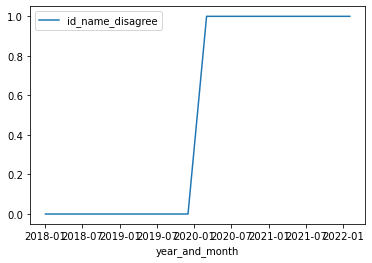

In [11]:
name_id_disagree_3794.plot(x="year_and_month",y="id_name_disagree")

In [86]:
station_stats3794_pre2020=exec_query("""
    
    CALL station_stats(3794,0,2019);""")
station_stats3794_pre2020.head(15)

Exception during reset or similar
Traceback (most recent call last):
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 682, in _finalize_fairy
    fairy._reset(pool)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 887, in _reset
    pool._dialect.do_rollback(self)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\engine\default.py", line 667, in do_rollback
    dbapi_connection.rollback()
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\mysql\connector\connection_cext.py", line 419, in rollback
    self._cmysql.rollback()
_mysql_connector.MySQLInterfaceError: Commands out of sync; you can't run this command now


,other_station_id,other_station_name,latitude,longitude,share_of_trips,avg_duration_minutes
0,3798.0,21st & Speedway @PCL,30.2830,-97.7375,0.4765,10.6154
1,3838.0,Nueces & 26th,30.2907,-97.7429,0.0709,14.1753
2,3793.0,Rio Grande & 28th,30.2933,-97.7441,0.0668,11.6372
3,3799.0,23rd & San Jacinto @ DKR Stadium,30.2856,-97.7335,0.0539,16.1346
4,3797.0,21st & University,30.2835,-97.7395,0.0532,13.1491
5,3841.0,23rd & Rio Grande,30.2873,-97.7449,0.0505,28.2282
6,3792.0,22nd & Pearl,30.2853,-97.7467,0.0440,16.2254
7,2547.0,Guadalupe & 21st,30.2840,-97.7420,0.0420,10.6174
8,3795.0,Dean Keeton & Whitis,30.2898,-97.7404,0.0416,10.4124
9,0.0,South Congress/Mary,30.2450,-97.7513,0.0396,24.0197


In [87]:
station_stats3794_post2020=exec_query("""
    
    CALL station_stats(3794,2019,2023);""")
station_stats3794_post2020.head(15)

Exception during reset or similar
Traceback (most recent call last):
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 682, in _finalize_fairy
    fairy._reset(pool)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 887, in _reset
    pool._dialect.do_rollback(self)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\engine\default.py", line 667, in do_rollback
    dbapi_connection.rollback()
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\mysql\connector\connection_cext.py", line 419, in rollback
    self._cmysql.rollback()
_mysql_connector.MySQLInterfaceError: Commands out of sync; you can't run this command now


,other_station_id,other_station_name,latitude,longitude,share_of_trips,avg_duration_minutes
0,2539.0,Convention Center / 3rd & Trinity,30.2643,-97.7402,0.0838,38.1732
1,0.0,South Congress/Mary,30.2450,-97.7513,0.0593,48.9644
2,2542.0,Plaza Saltillo,30.2622,-97.7274,0.0450,25.2813
3,3621.0,Nueces & 3rd,30.2670,-97.7493,0.0429,36.5956
4,2563.0,Rainey/Driskill,30.2608,-97.7381,0.0393,33.5655
5,3660.0,Medina & East 6th,30.2645,-97.7317,0.0370,25.1329
6,2552.0,3rd & West,30.2678,-97.7519,0.0319,57.4265
7,2494.0,2nd & Congress,30.2641,-97.7436,0.0288,39.2602
8,2495.0,4th & Congress,30.2663,-97.7438,0.0283,33.4876
9,2501.0,5th & Bowie,30.2696,-97.7533,0.0267,45.6053


In [88]:
station_stats2498_pre2020=exec_query("""
    
    CALL station_stats(2498,0,2019);""")
station_stats2498_pre2020.head(15)

Exception during reset or similar
Traceback (most recent call last):
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 682, in _finalize_fairy
    fairy._reset(pool)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 887, in _reset
    pool._dialect.do_rollback(self)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\engine\default.py", line 667, in do_rollback
    dbapi_connection.rollback()
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\mysql\connector\connection_cext.py", line 419, in rollback
    self._cmysql.rollback()
_mysql_connector.MySQLInterfaceError: Commands out of sync; you can't run this command now


,other_station_id,other_station_name,latitude,longitude,share_of_trips,avg_duration_minutes
0,2499.0,City Hall / Lavaca & 2nd,30.2648,-97.7468,0.0609,16.8101
1,0.0,South Congress/Mary,30.2450,-97.7513,0.0541,51.8459
2,2501.0,5th & Bowie,30.2696,-97.7533,0.0477,14.6875
3,2563.0,Rainey/Driskill,30.2608,-97.7381,0.0459,19.3422
4,2502.0,Barton Springs & Riverside,30.2587,-97.7487,0.0432,12.9698
5,2494.0,2nd & Congress,30.2641,-97.7436,0.0393,18.2506
6,2552.0,3rd & West,30.2678,-97.7519,0.0376,11.2169
7,2542.0,Plaza Saltillo,30.2622,-97.7274,0.0355,15.0852
8,2496.0,8th & Congress,30.2698,-97.7419,0.0337,15.7444
9,2707.0,Rainey St @ Cummings,30.2559,-97.7400,0.0273,18.5050


In [89]:
station_stats2498_post2020=exec_query("""
    
    CALL station_stats(2498,2019,2023);""")
station_stats2498_post2020.head(15)

Exception during reset or similar
Traceback (most recent call last):
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 682, in _finalize_fairy
    fairy._reset(pool)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\pool\base.py", line 887, in _reset
    pool._dialect.do_rollback(self)
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\sqlalchemy\engine\default.py", line 667, in do_rollback
    dbapi_connection.rollback()
  File "C:\Users\Michael\Anaconda3\envs\bikeshare\lib\site-packages\mysql\connector\connection_cext.py", line 419, in rollback
    self._cmysql.rollback()
_mysql_connector.MySQLInterfaceError: Commands out of sync; you can't run this command now


,other_station_id,other_station_name,latitude,longitude,share_of_trips,avg_duration_minutes
0,3798,21st & Speedway @PCL,30.2830,-97.7375,0.2350,11.4985
1,3793,Rio Grande & 28th,30.2933,-97.7441,0.1170,11.6433
2,3795,Dean Keeton & Whitis,30.2898,-97.7404,0.0936,22.7782
3,3838,Nueces & 26th,30.2907,-97.7429,0.0916,13.5193
4,3792,22nd & Pearl,30.2853,-97.7467,0.0550,15.3161
5,2548,UT West Mall @ Guadalupe,30.2858,-97.7418,0.0462,16.5830
6,3797,21st & University,30.2835,-97.7395,0.0440,13.8616
7,2547,Guadalupe & 21st,30.2840,-97.7420,0.0420,13.7743
8,3799,23rd & San Jacinto @ DKR Stadium,30.2856,-97.7335,0.0378,12.6078
9,0,South Congress/Mary,30.2450,-97.7513,0.0318,46.5941
